<a href="https://colab.research.google.com/github/hagigat/NeuralNetwork/blob/master/CNN(Tensorflow)_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , Dense , Flatten , MaxPool2D
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize

In [2]:
cifar = tf.keras.datasets.cifar10
(x_train, y_train) , (x_test, y_test) = cifar.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [0]:
x_train = x_train / 255
x_test = x_test / 255

In [4]:
print(x_train.shape)
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 3)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 3)

(50000, 32, 32, 3)


In [23]:
model = tf.keras.models.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax'),
])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_59 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 10, 10, 64)        36928     
_________________________________________________________________
flatten_13 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 64)              

In [24]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])
output = model.fit(x_train, y_train, 
                   epochs = 5,
                   validation_data = (x_test, y_test) , shuffle = 'true')

Epoch 1/5
1563/1563 [==============================] - 164s 105ms/step - loss: 1.4486 - accuracy: 0.4746 - val_loss: 1.2105 - val_accuracy: 0.5682
Epoch 2/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.0247 - accuracy: 0.6394 - val_loss: 1.0092 - val_accuracy: 0.6481
Epoch 3/5
1563/1563 [==============================] - 167s 107ms/step - loss: 0.8353 - accuracy: 0.7082 - val_loss: 0.8808 - val_accuracy: 0.6954
Epoch 4/5
1563/1563 [==============================] - 168s 108ms/step - loss: 0.7206 - accuracy: 0.7485 - val_loss: 0.7985 - val_accuracy: 0.7230
Epoch 5/5
1563/1563 [==============================] - 169s 108ms/step - loss: 0.6284 - accuracy: 0.7801 - val_loss: 0.7759 - val_accuracy: 0.7382


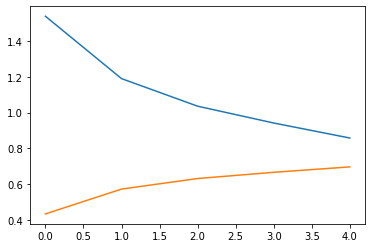

In [7]:
train_loss = output.history['loss']
train_acc = output.history['accuracy']

plt.plot(train_loss)
plt.plot(train_acc)
plt.show()

In [8]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 6s 20ms/step - loss: 0.9416 - accuracy: 0.6690


[0.941648542881012, 0.6690000295639038]